# Multilayer networks with Keras 


We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from conv_net_utils import generate_dataset

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We'll also set up some configuration variables up-front:

### The first example is a linearly separable data-set:

In [3]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, 
                                                                    n_train=1000, 
                                                                    n_test=200, 
                                                                    num_labels=2,
                                                                    centers=2, 
                                                                    center_box=[-4., 4.])

In [4]:
train_data.shape, train_labels.shape

((1000, 2), (1000, 2))

In [5]:
train_data[:10]

array([[ 1.6127049 ,  0.6910812 ],
       [ 3.0290906 ,  3.6254842 ],
       [ 1.5145255 ,  2.904137  ],
       [ 3.2300115 ,  2.8231483 ],
       [-3.2624357 , -0.30297235],
       [-4.044293  , -0.07885999],
       [ 1.0116819 ,  3.663942  ],
       [ 2.30768   ,  5.3704906 ],
       [ 3.7669504 ,  1.3014822 ],
       [ 3.513515  ,  2.6875575 ]], dtype=float32)

In [6]:
train_labels[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

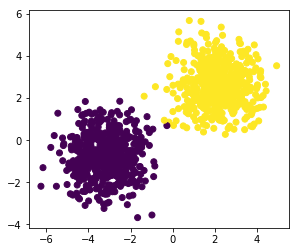

In [7]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [8]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data.shape[-1],), activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## An aside about the softmax function 

The softmax function defined mathemtatically as: 

$f(y_i) = \frac{e^{y_i}}{\sum_i{e^{y_i}}}$

assigns each of the possible outputs a probability (a number between 0-1, all sum together to 1). 

It also has the effect of 'mutual inhibition' between alternative options. 

Consider our case, with two options:


In [10]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [11]:
output = []
xs = np.arange(1, 11, 1)
for ii in xs:
    x = [10-ii, ii]
    output.append(softmax(x))

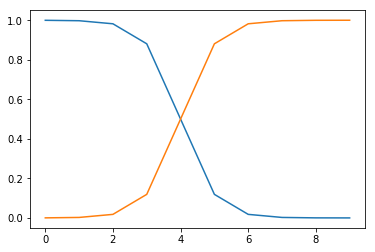

In [12]:
plt.plot(output)

In [13]:
model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 241us/step - loss: 0.7476 - acc: 0.4388 - val_loss: 0.6181 - val_acc: 0.6650
Epoch 2/5
800/800 [==============================] - 0s 14us/step - loss: 0.5555 - acc: 0.8813 - val_loss: 0.4855 - val_acc: 0.9700
Epoch 3/5
800/800 [==============================] - 0s 15us/step - loss: 0.4407 - acc: 0.9888 - val_loss: 0.3904 - val_acc: 0.9950
Epoch 4/5
800/800 [==============================] - 0s 12us/step - loss: 0.3553 - acc: 0.9975 - val_loss: 0.3169 - val_acc: 0.9950
Epoch 5/5
800/800 [==============================] - 0s 13us/step - loss: 0.2884 - acc: 0.9975 - val_loss: 0.2580 - val_acc: 0.9950


In [14]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)

200/200 [==============================] - 0s 11us/step


In [15]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.25178417563438416
acc : 1.0


In [16]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

In [17]:
prediction

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0,

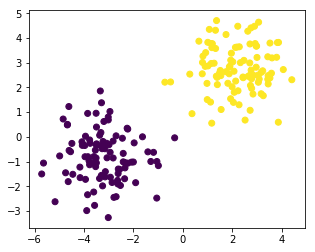

In [18]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')



### The next set of data is not linearly separable:

In [19]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_moons, 
                                                                    n_train=1000, 
                                                                    n_test=200,
                                                                    num_labels=2, 
                                                                    noise=0.2)

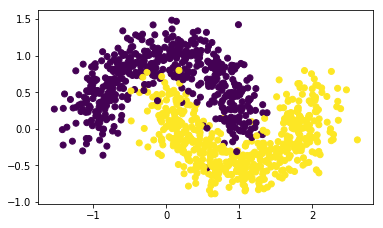

In [20]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [21]:
model.fit(train_data, train_labels, nb_epoch=5, batch_size=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 13us/step - loss: 0.6533 - acc: 0.6613 - val_loss: 0.6762 - val_acc: 0.5850
Epoch 2/5
800/800 [==============================] - 0s 12us/step - loss: 0.6255 - acc: 0.6975 - val_loss: 0.6516 - val_acc: 0.6300
Epoch 3/5
800/800 [==============================] - 0s 14us/step - loss: 0.6009 - acc: 0.7213 - val_loss: 0.6278 - val_acc: 0.6700
Epoch 4/5
800/800 [==============================] - 0s 11us/step - loss: 0.5773 - acc: 0.7475 - val_loss: 0.6045 - val_acc: 0.7000
Epoch 5/5
800/800 [==============================] - 0s 13us/step - loss: 0.5545 - acc: 0.7612 - val_loss: 0.5823 - val_acc: 0.7100


/Users/arokem/.virtualenvs/conv-nets/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


In [22]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 19us/step

loss : 0.540249764919281
acc : 0.7549999952316284


In [23]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

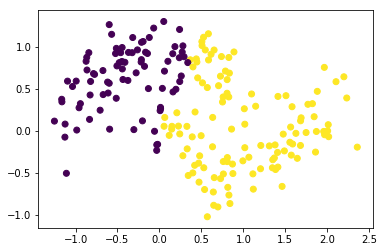

In [24]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')

In [25]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, 
                                                                    n_train=1000,
                                                                    n_test=200, 
                                                                    noise=0.2, 
                                                                    num_labels=2,
                                                                    factor=0.1)

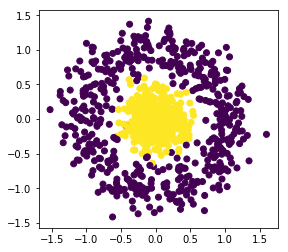

In [26]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [27]:
model.fit(train_data, train_labels, nb_epoch=5, batch_size=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 13us/step - loss: 0.6945 - acc: 0.5337 - val_loss: 0.6966 - val_acc: 0.5350
Epoch 2/5
800/800 [==============================] - 0s 11us/step - loss: 0.6791 - acc: 0.5537 - val_loss: 0.6806 - val_acc: 0.5650
Epoch 3/5
800/800 [==============================] - 0s 18us/step - loss: 0.6640 - acc: 0.5913 - val_loss: 0.6642 - val_acc: 0.5950
Epoch 4/5
800/800 [==============================] - 0s 17us/step - loss: 0.6491 - acc: 0.6050 - val_loss: 0.6490 - val_acc: 0.6200
Epoch 5/5
800/800 [==============================] - 0s 17us/step - loss: 0.6343 - acc: 0.6225 - val_loss: 0.6337 - val_acc: 0.6550


/Users/arokem/.virtualenvs/conv-nets/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


In [28]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 17us/step

loss : 0.619082897901535
acc : 0.6200000047683716


In [29]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

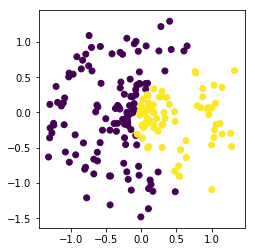

In [30]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')

In [31]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data.shape[-1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 284us/step - loss: 0.6840 - acc: 0.6538 - val_loss: 0.6549 - val_acc: 0.6450
Epoch 2/5
800/800 [==============================] - 0s 11us/step - loss: 0.6478 - acc: 0.6712 - val_loss: 0.6224 - val_acc: 0.7650
Epoch 3/5
800/800 [==============================] - 0s 14us/step - loss: 0.6176 - acc: 0.7600 - val_loss: 0.5918 - val_acc: 0.8100
Epoch 4/5
800/800 [==============================] - 0s 13us/step - loss: 0.5880 - acc: 0.8200 - val_loss: 0.5615 - val_acc: 0.8350
Epoch 5/5
800/800 [==============================] - 0s 14us/step - loss: 0.5592 - acc: 0.8462 - val_loss: 0.5325 - val_acc: 0.8650

200/200 [==============================] - 0s 12us/step

loss : 0.5427005290985107
acc : 0.8350000083446503


In [33]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

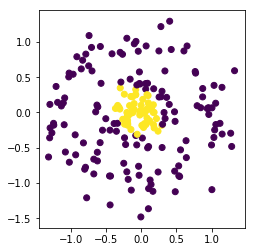

In [34]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')